# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [9]:
numbs = np.random.random(10)
np.savetxt("simple_data.txt", numbs)

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [10]:
numbs = np.random.random((5,5))
print(numbs.shape)
np.savetxt("data.txt", numbs)

(5, 5)


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [12]:
data1 = np.loadtxt("simple_data.txt")
data2 = np.loadtxt("data.txt")

import csv

with open("simple_data.csv", mode='w') as data1_file:
    data1_writer = csv.writer(data1_file, delimiter=',',)
    data1_writer.writerow(data1)

with open("data.csv", mode='w') as data2_file:
    data2_writer = csv.writer(data2_file, delimiter=',',)
    
    for row in data2:
        data2_writer.writerow(row)

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [105]:
file = open('credit_card.dat','r')
data = file.read().split('\n')
print(data[:5])


def get_credit_card(binary):
    nchar = len(binary)//6
    
    card_number = []
    
    for i in range(nchar):
        num = int(binary[i*6:(i+1)*6],2)
        char = chr(num)
        card_number.append(chr(num))
    
    return ''.join(card_number)

cards = list(map(get_credit_card, data))
print(cards[:5])

['1101111101101101001110001000001101011101101101111100111000001100111101111101111101011000001100101100101101111100011010', '1100111100101101011101111000001110001100101101001101111000001100111100111101011101001000001100101100101101101101101010', '1100101101111100101100101000001100001100001100001100011000001101001100001100011100011000001101101101101101011100101010', '1100001101101101101100011000001100111100001101101100111000001100111101111101001100101000001100111100011101011100001010', '1100001101001100111100101000001100011101101100001110001000001100011101001101101100101000001101001101111101001100101010']
['7648 5673 3775 2271', '3257 8247 3354 2266', '2722 0001 4011 6652', '0661 3063 3742 3150', '0432 1608 1462 4742']


5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [120]:
import json
data = json.load(open('user_data.json'))
print(data[0])
print('\nTotal original entries: '+str(len(data)))

# filter data by "CreditCardType" field equals to "American Express"
filtered_data = [d for d in data if d['CreditCardType']=='American Express']
print('Total filtered entries: '+str(len(filtered_data)))
print(filtered_data[0])

# save to .csv
with open("user_data.csv", mode='w') as data_file:
    data_writer = csv.writer(data_file, delimiter=',',)
    
    data_writer.writerow(filtered_data)

{'ID': '1', 'JobTitle': 'Project Manager', 'EmailAddress': 'Remy_Crawford1065@typill.biz', 'FirstNameLastName': 'Remy Crawford', 'CreditCard': '6205-7258-7671-0612', 'CreditCardType': 'Capital One'}

Total original entries: 200
Total filtered entries: 20
{'ID': '2', 'JobTitle': 'Investment  Advisor', 'EmailAddress': 'Clint_Thorpe5003@bulaffy.com', 'FirstNameLastName': 'Clint Thorpe', 'CreditCard': '7083-8766-0251-2345', 'CreditCardType': 'American Express'}


6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe what you see


In [122]:
import pandas as pd

url ='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
data = pd.read_csv(url)

In [124]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff15e9c4a20>]],
      dtype=object)

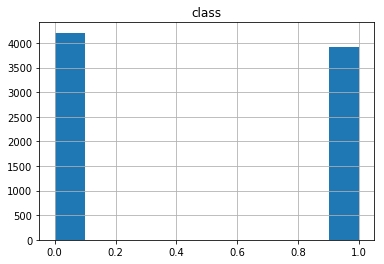

In [126]:
data.hist('class')

There are only two classes in the dataset.

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

In [129]:
import matplotlib.pyplot as plt

url ='https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'
data = pd.read_csv(url)

In [130]:
data.describe()

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.942564,-0.006400,0.013348,0.005297,0.000184,-0.000480,-0.017532,-0.020000,0.000977,-0.012128,...,-0.018581,0.000596,-0.024344,0.031803,0.010992,-0.031234,-0.010935,0.004365,-0.022926,-0.008357
std,203.282356,1.006368,0.996602,1.003514,1.006999,0.989669,0.979118,1.024935,0.995729,1.003996,...,0.965565,1.001508,1.007492,1.030215,1.014416,1.029872,0.989929,1.000560,1.018394,1.010651
min,-660.492553,-3.718751,-3.613474,-4.242018,-3.472173,-3.192733,-3.236102,-3.315018,-3.484294,-3.408253,...,-3.571978,-3.315530,-3.626445,-2.851860,-3.448782,-3.364165,-3.200671,-2.642875,-3.375460,-3.348881
25%,-134.575171,-0.683980,-0.663803,-0.686082,-0.700964,-0.697906,-0.647818,-0.720096,-0.722493,-0.668250,...,-0.663219,-0.695951,-0.690677,-0.670424,-0.664493,-0.739446,-0.679528,-0.676490,-0.686613,-0.670550
50%,-4.879239,0.011044,-0.006613,0.024809,0.013137,0.005643,-0.036697,-0.018051,-0.007620,-0.035900,...,-0.008121,0.007316,-0.027552,0.028501,0.021373,-0.057184,-0.000981,0.010420,-0.018591,-0.011530
75%,131.623753,0.674461,0.680902,0.692081,0.692169,0.662793,0.672695,0.659409,0.694360,0.682040,...,0.631954,0.649981,0.661220,0.735902,0.704919,0.672838,0.654921,0.659399,0.642514,0.648848
max,697.402230,3.434959,3.123339,2.764707,3.215090,2.961331,3.341143,4.258732,3.352662,3.107141,...,3.413465,3.321506,3.308517,3.887561,3.509969,3.249865,3.462119,3.669967,3.465233,3.514099


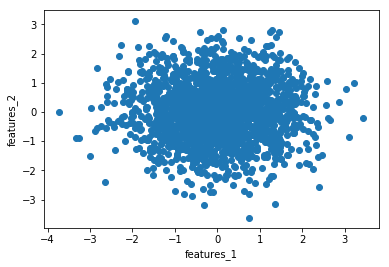

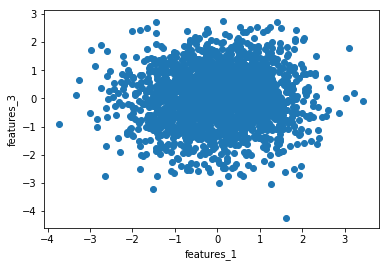

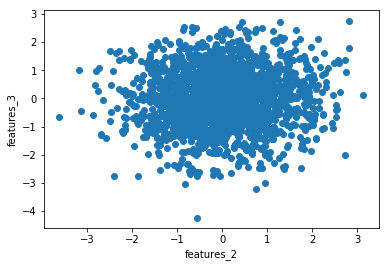

In [139]:
feat = ['features_1', 'features_2', 'features_3']

for i in range(2):
    for j in range(i+1,3):
        plt.figure()
        plt.scatter(data[feat[i]], data[feat[j]])
        plt.xlabel(feat[i])
        plt.ylabel(feat[j])
plt.show()

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [140]:
url ='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
data = pd.read_csv(url)

In [141]:
data_json = data.to_json()

import json
with open('data.json', 'w') as file:
    json.dump(data_json, file)